# DIAMOND PRICE PREDICTION

**Submitted by** : Karunya K

**Project Evaluation Date**: 31-07-2024

### TABLE OF CONTENTS


#### 1. Problem Statement
#### 2. Objective
#### 3. Data Collection
#### 4. Data Description
#### 5. EDA
#### 6. Data Preprocessing
#### 7. Visualization
#### 8. Feature Engineering
#### 9. Data Splitting
#### 10. Model Selection
#### 11. Model Training and Evaluation (Without feature selection and hyperparameter tuning)
#### 12. Feature Selection
#### 13. Hyperparameter tuning
#### 14. Saving the model
#### 15. Load the model

#### PROBLEM STATEMENT

The diamond industry is highly competitive, and accurate pricing is crucial for maintaining profitability and customer satisfaction. Diamonds are priced based on multiple attributes, each contributing differently to the overall value. Traditional pricing methods can be subjective and inconsistent, leading to potential discrepancies and loss of revenue. By leveraging data analytics and machine learning, we aim to create a robust model that standardizes and predicts diamond prices with high accuracy.

#### OBJECTIVE

To develop a predictive model that accurately estimates the price of diamonds based on various features such as carat, cut, color, clarity, and other relevant attributes.

#### DATA COLLECTION

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dm=pd.read_csv('diamonds.csv')
dm.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### DATA DESCRIPTION

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for learning to work with data analysis and visualization.

**Dataset**:  https://www.kaggle.com/datasets/shivam2503/diamonds
- ***carat*** (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram .
- ***cut*** (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.
- ***color*** (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light     brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.
- ***clarity*** (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.
- ***depth*** (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.
- ***table*** (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.
- ***price*** ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.
- ***x*** (0 - 10.74): Length of the diamond (in mm)
- ***y*** (0 - 58.9): Width of the diamond (in mm)
- ***z*** (0 - 31.8): Depth of the diamond (in mm)widest point (43--95)t (43--95)

### EXPLORATORY DATA ANALYSIS

In [20]:
dm.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [21]:
dm.shape

(53940, 11)

In [22]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [23]:
dm.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
dm.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [25]:
dm.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [26]:
dm.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [27]:
dm["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [28]:
dm["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [29]:
dm["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [30]:
dm.duplicated().sum()

0

In [31]:
num_cols=dm.select_dtypes(include='number').columns
num_cols

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [32]:
cat_cols=dm.select_dtypes(include='object').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

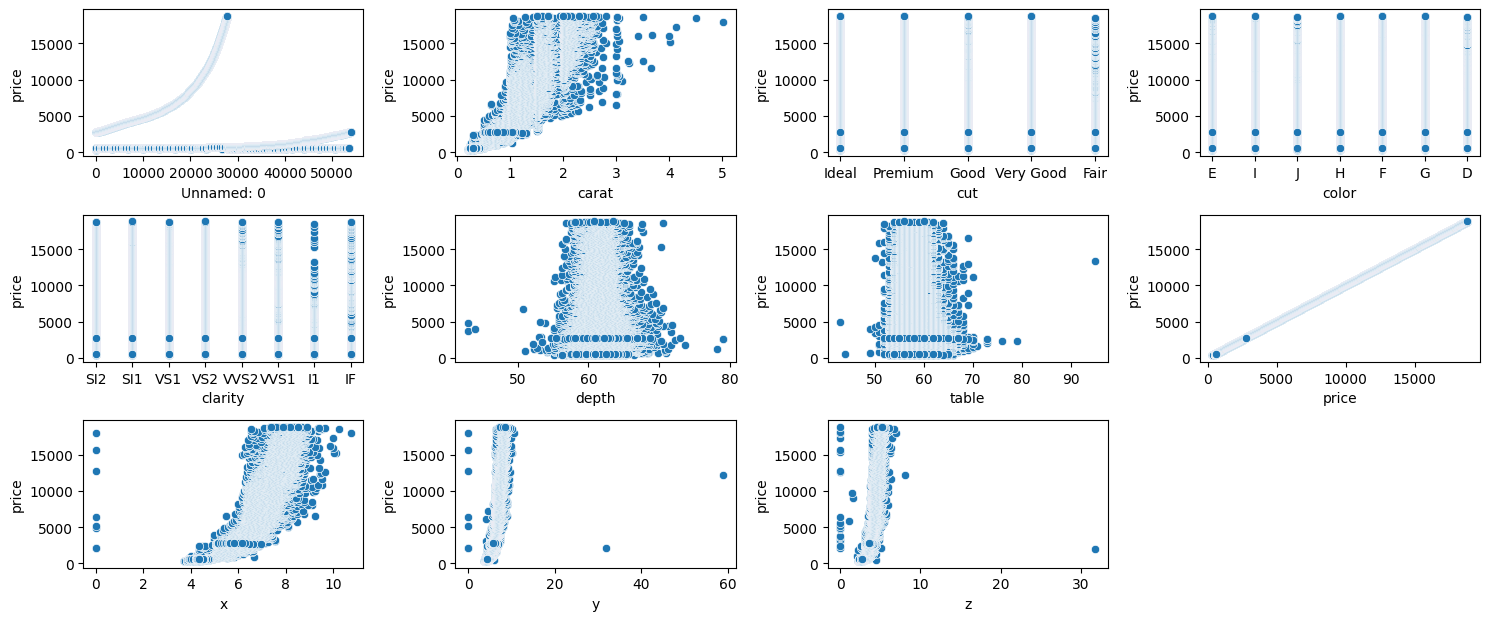

In [33]:
# scatter plot to identify the relationship between price and remaining features
plt.figure(figsize=(15, 10))
for i, col in enumerate(dm.columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=dm,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### Correlation Matrix

In [35]:
dmcorr=dm.drop(["cut","color","clarity"],axis=1)
corr1=dmcorr.corr()
corr1

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


#### Heat map

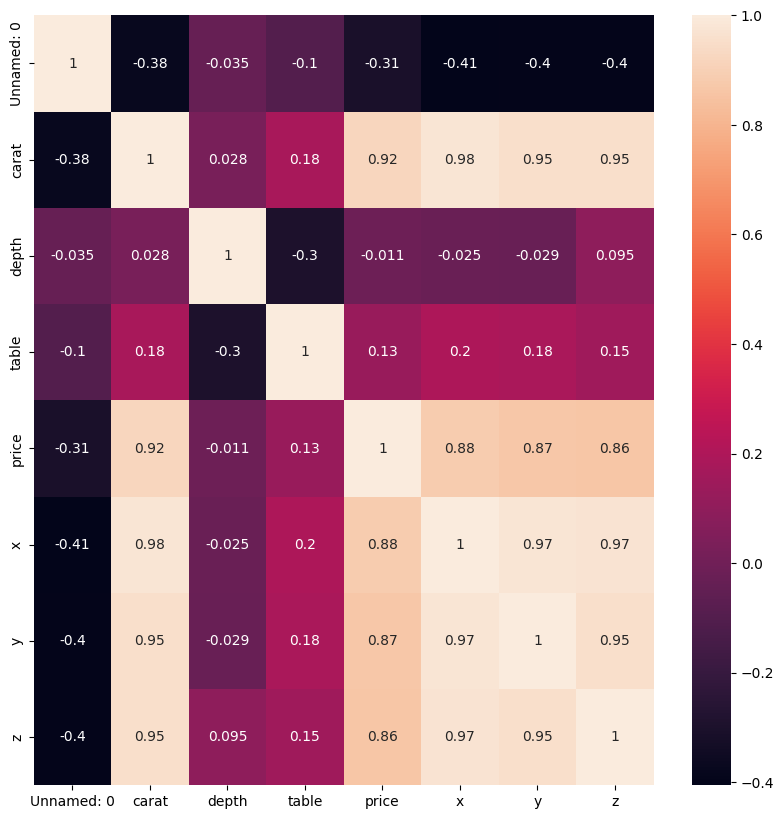

In [36]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr1,annot=True)
plt.show()

##### The feature depth is least correlated (<0.1) with the target variable. 

##### Features with multicollinearity:

##### carat and x
##### carat and y
##### carat and z
##### x and y
##### x and z


(0.0, 1.0, 0.0, 1.0)

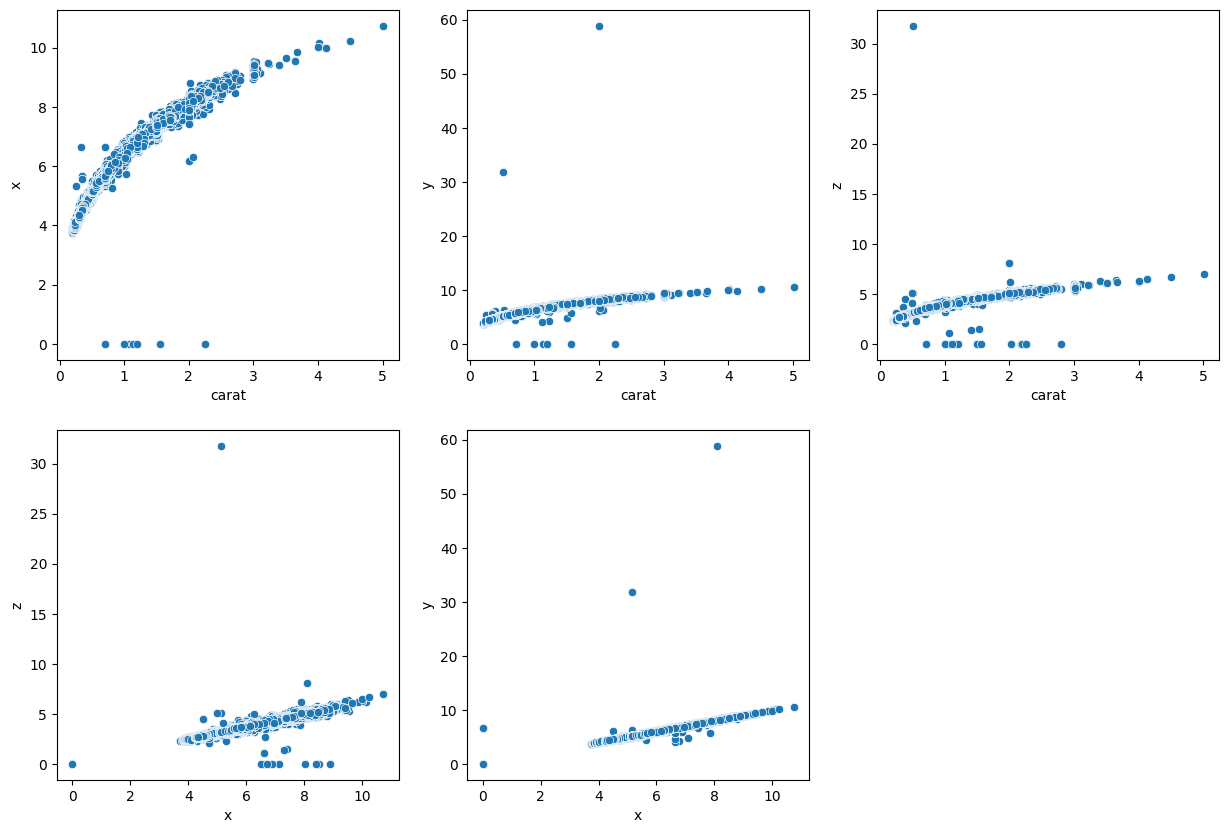

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.scatterplot(x='carat', y='x', data=dm, ax=axes[0, 0])  
sns.scatterplot(x='carat', y='y', data=dm, ax=axes[0, 1])  
sns.scatterplot(x='carat', y='z', data=dm, ax=axes[0, 2])  
sns.scatterplot(x='x', y='z', data=dm, ax=axes[1, 0])  
sns.scatterplot(x='x', y='y', data=dm, ax=axes[1, 1])  
axes[1, 2].axis('off')

In [40]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = dm[num_cols].apply(skew)
kurt = dm[num_cols].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Unnamed: 0    0.000000
carat         1.116615
depth        -0.082292
table         0.796874
price         1.618350
x             0.378666
y             2.434099
z             1.522380
dtype: float64
Unnamed: 0     1.800000
carat          4.256408
depth          8.738771
table          5.801486
price          5.177383
x              2.381785
y             94.205991
z             50.082143
dtype: float64
Variables with positive skewness (skew > 1):
 carat    1.116615
price    1.618350
y        2.434099
z        1.522380
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 Unnamed: 0    1.800000
x             2.381785
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 carat     4.256408
depth     8.738771
table     5.801486
price     5.177383
y        94.205991
z        50.082143
dtype: float64


#### DATA PREPROCESSING

In [41]:
dm.drop(["Unnamed: 0"],axis=1,inplace=True)  # drop unwanted column

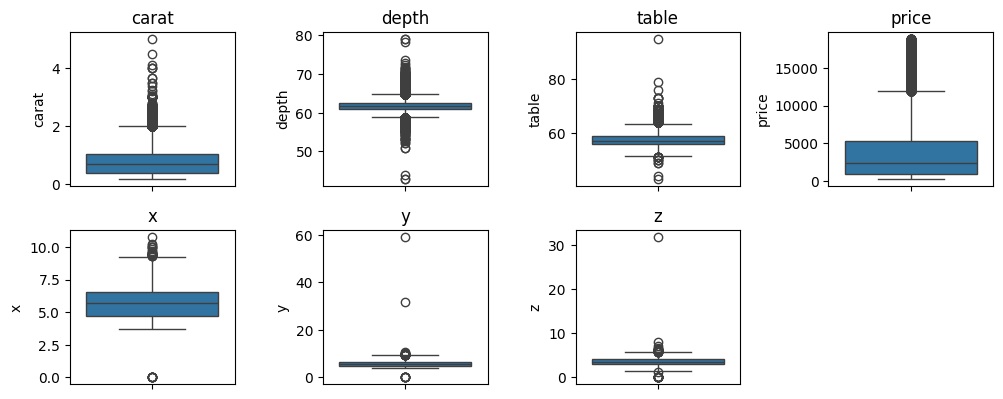

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = dm.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dm[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (carat)

In [43]:
q1c=dm.carat.quantile(0.25)
q3c=dm.carat.quantile(0.75)
iqrc=q3c-q1c

In [44]:
lwc=q1c-1.5*iqrc
uwc=q3c+1.5*iqrc

In [45]:
dmp1=dm[(dm.carat>lwc)&(dm.carat<uwc)]
dmp1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


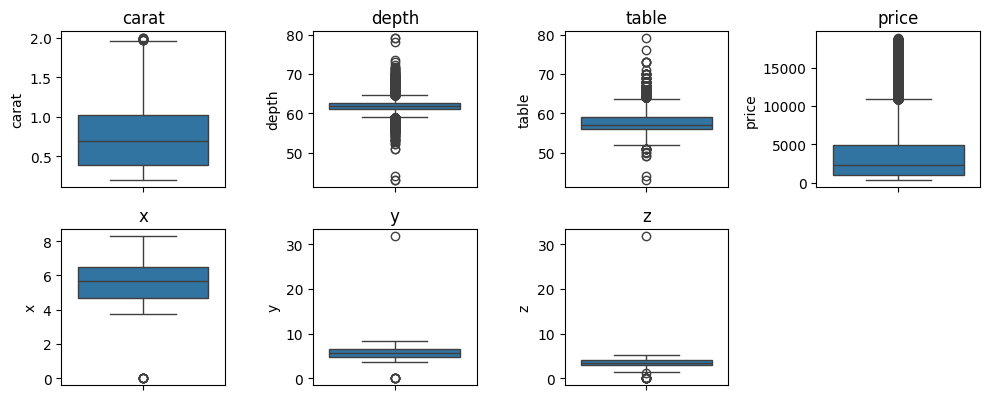

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = dmp1.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers(depth)

In [47]:
q1d=dmp1.depth.quantile(0.25)
q3d=dmp1.depth.quantile(0.75)
iqrd=q3d-q1d

In [48]:
lwd=q1d-1.5*iqrd
uwd=q3d+1.5*iqrd

In [49]:
dmp2=dmp1[(dmp1.depth>lwd)&(dmp1.depth<uwd)]
dmp2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


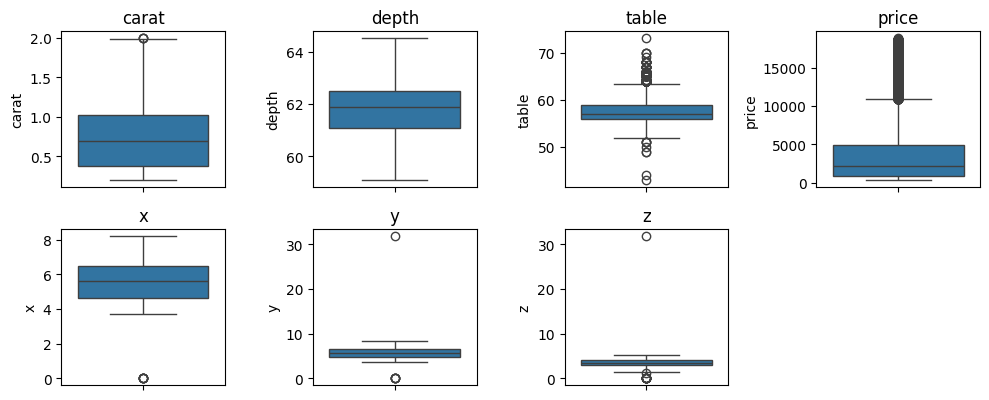

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = dmp2.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp2[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (table)

In [51]:
q1t=dmp2.table.quantile(0.25)
q3t=dmp2.table.quantile(0.75)
iqrt=q3t-q1t

In [52]:
lwt=q1t-1.5*iqrt
uwt=q3t+1.5*iqrt

In [53]:
dmp3=dmp2[(dmp2.table>lwt)&(dmp2.table<uwt)]
dmp3

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


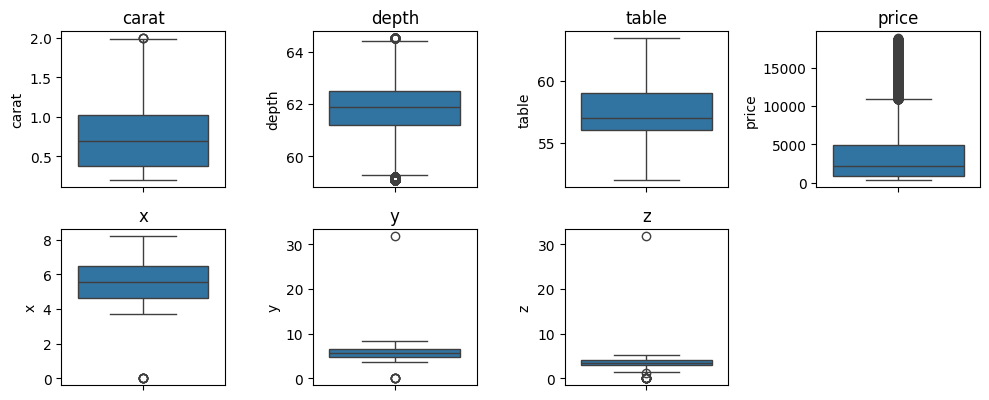

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = dmp3.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp3[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (price)

In [55]:
q1p=dmp3.price.quantile(0.25)
q3p=dmp3.price.quantile(0.75)
iqrp=q3p-q1p

In [56]:
lwp=q1p-1.5*iqrp
uwp=q3p+1.5*iqrp

In [57]:
dmp4=dmp3[(dmp3.price>lwp)&(dmp3.price<uwp)]
dmp4

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


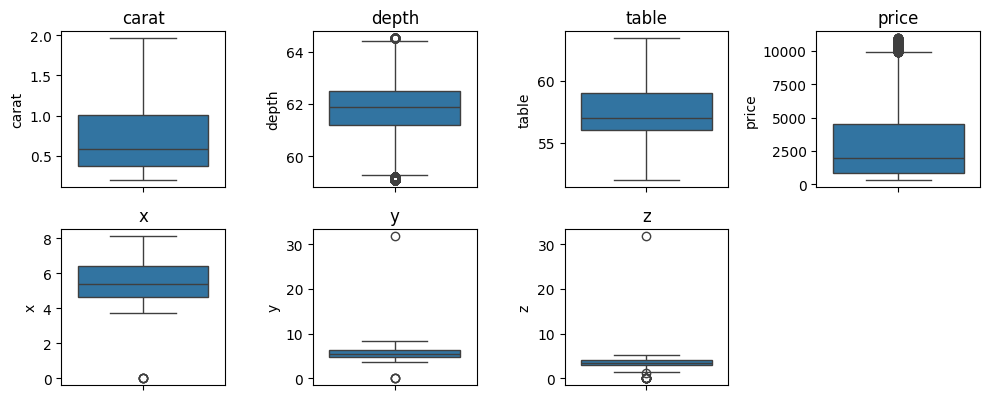

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = dmp4.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp4[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [63]:
dm1= dmp4.copy() #keeping a copy of pre processed data

In [66]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
num_cols=dm1.select_dtypes(include='number').columns
skewness = dm1[num_cols].apply(skew)
kurt = dm1[num_cols].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

carat    0.675461
depth   -0.195611
table    0.400590
price    1.135528
x        0.238078
y        0.666671
z        2.358287
dtype: float64
carat      2.503286
depth      2.874853
table      2.851785
price      3.420423
x          1.950914
y         13.821676
z        102.445340
dtype: float64
Variables with positive skewness (skew > 1):
 price    1.135528
z        2.358287
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 carat    2.503286
depth    2.874853
table    2.851785
x        1.950914
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 price      3.420423
y         13.821676
z        102.445340
dtype: float64


### VISUALIZATION

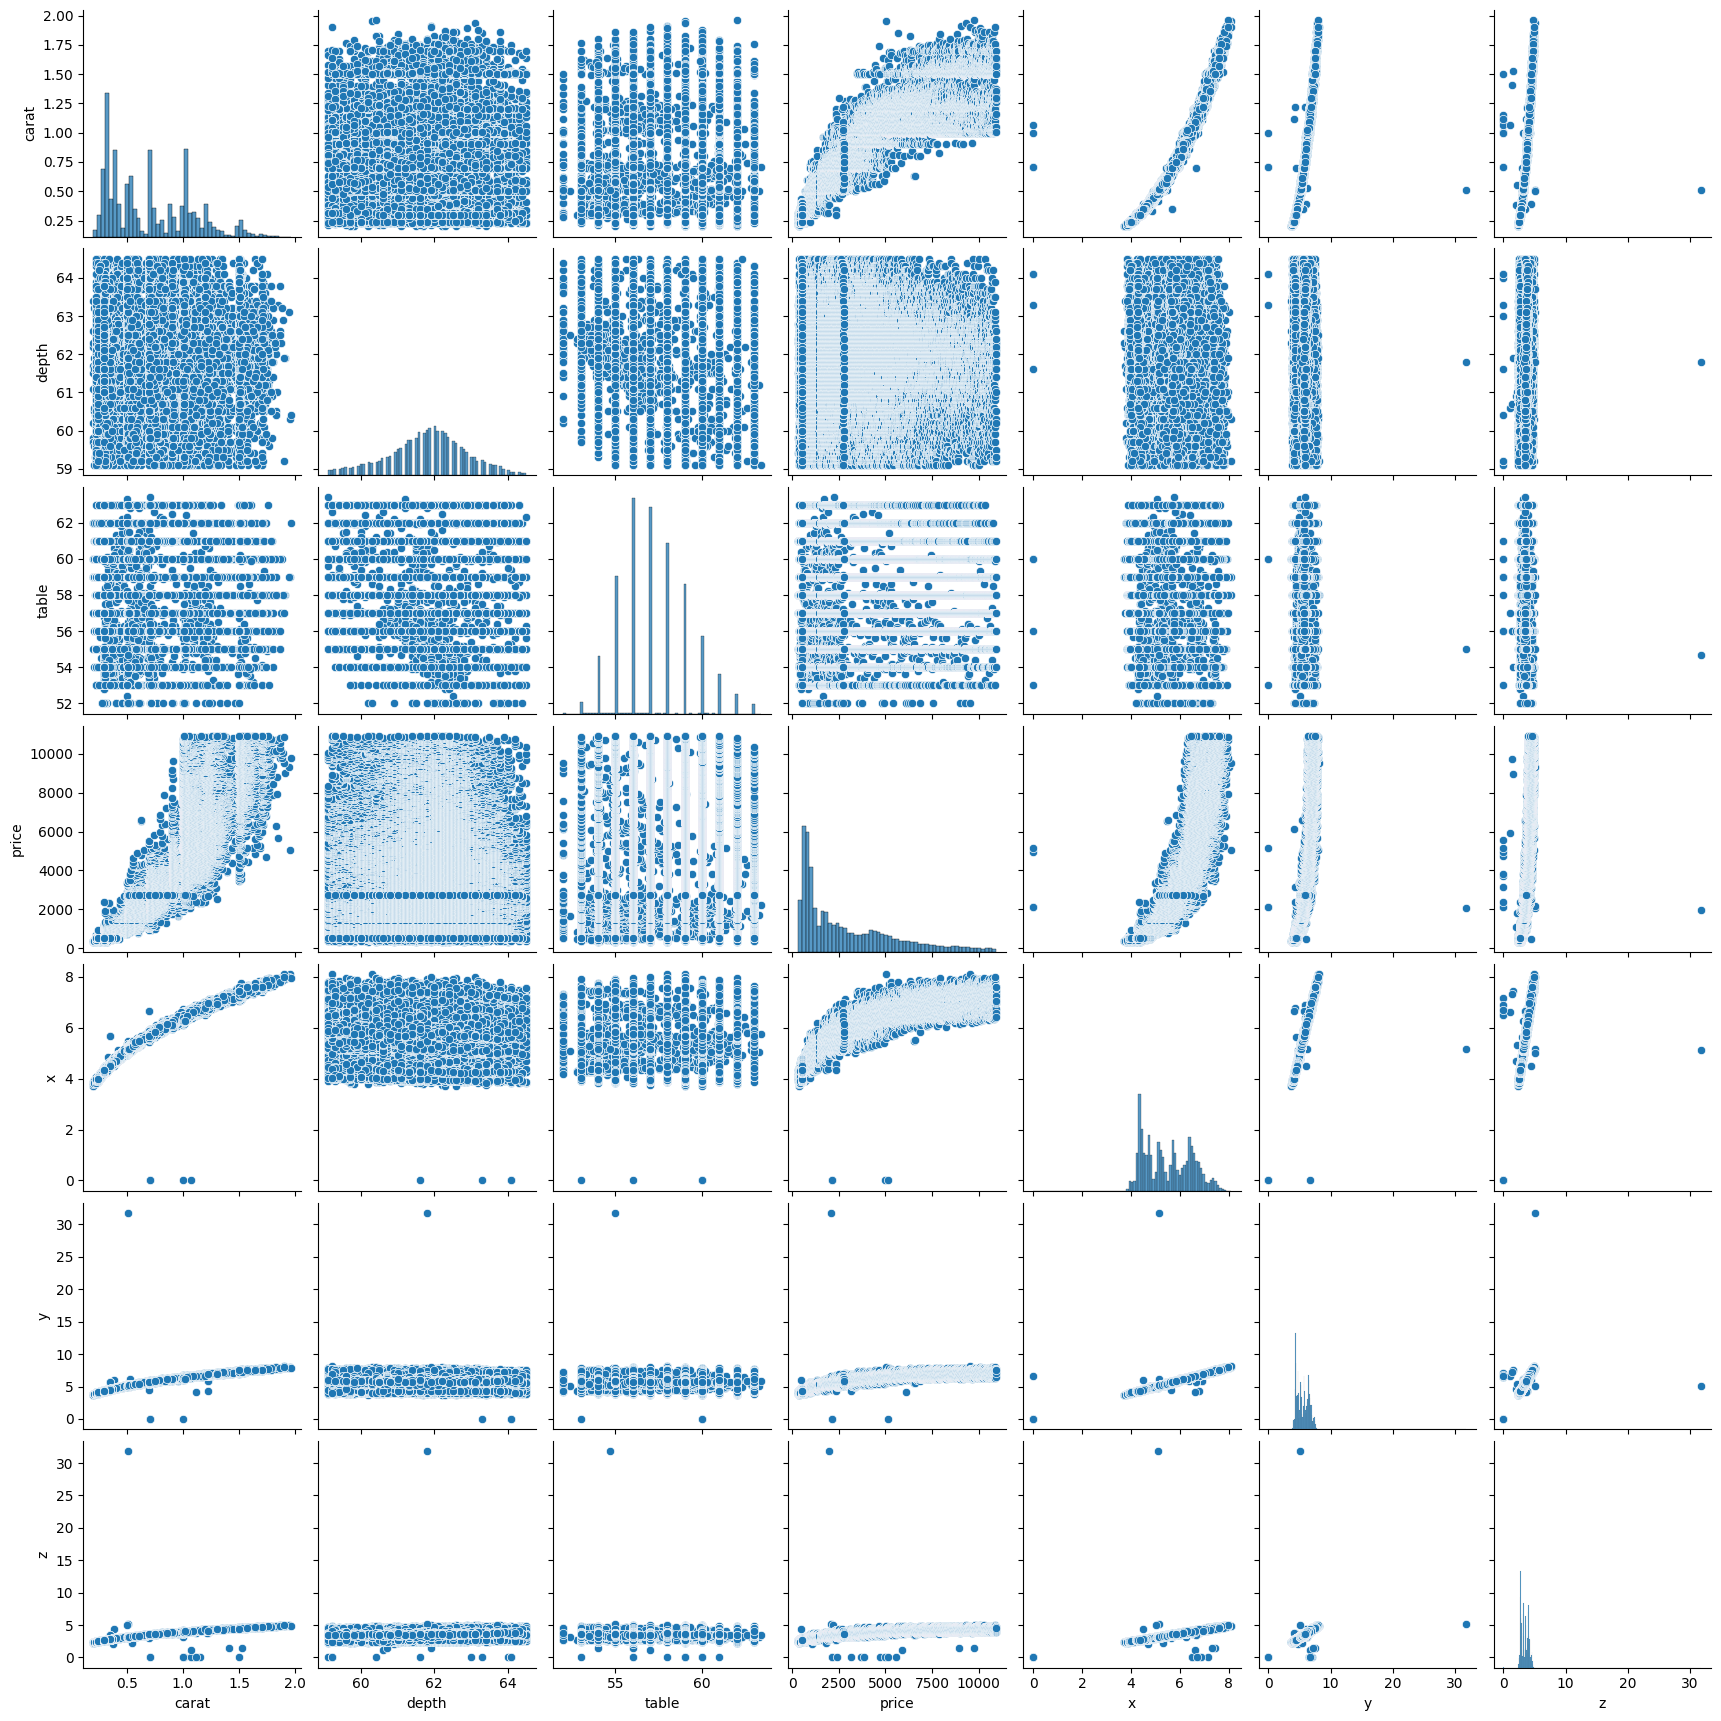

In [67]:
#Pair plot - To visualize relationships between multiple pairs of variables.
sns.pairplot(dm1)

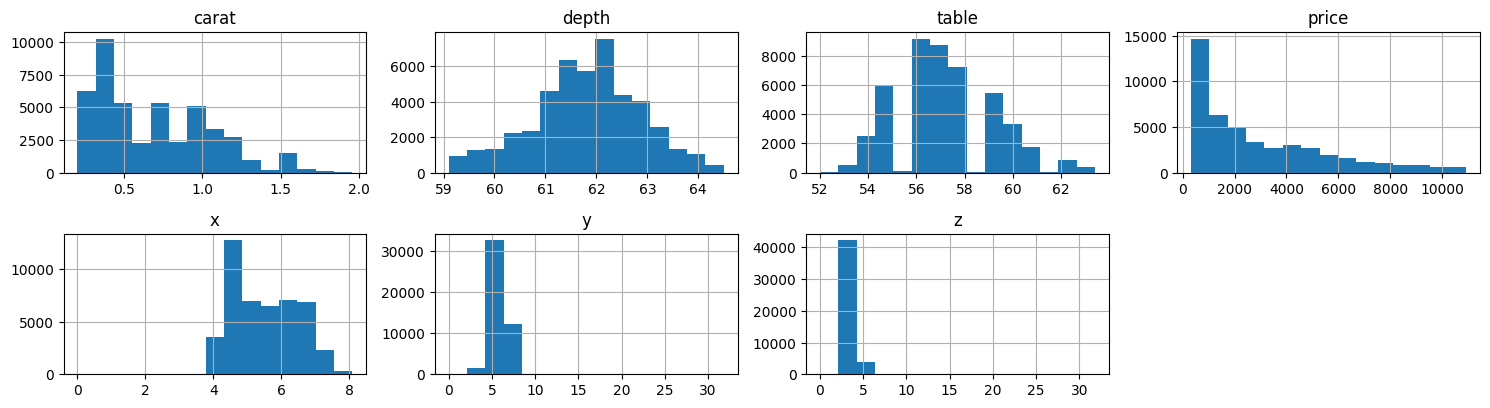

In [68]:
# Histograms for numerical columns after outlier treatment
num_cols = dm1.select_dtypes(include=['number']).columns

dm1[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

<Axes: xlabel='cut', ylabel='count'>

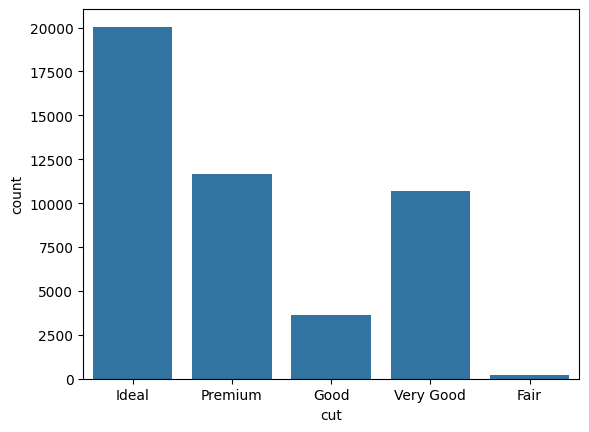

In [69]:
sns.countplot(x='cut', data=dm1)

<Axes: xlabel='clarity', ylabel='count'>

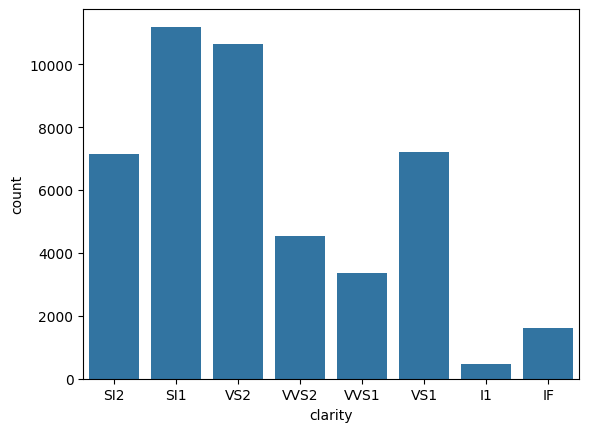

In [70]:
sns.countplot(x='clarity', data=dm1)

<Axes: xlabel='color', ylabel='count'>

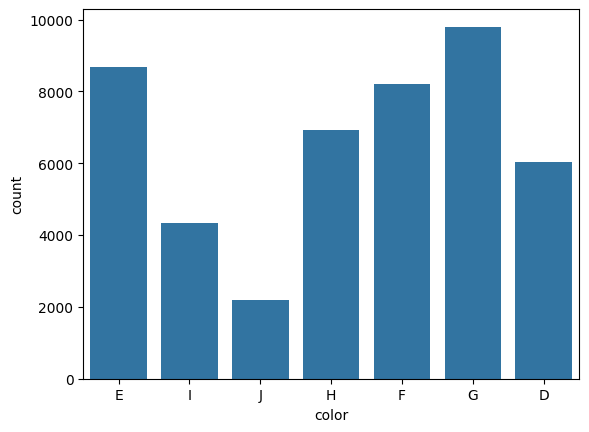

In [71]:
sns.countplot(x='color', data=dm1)

### FEATURE ENGINEERING

#### One hot encoding

In [72]:
dm1oh = pd.get_dummies(dm1[['cut',"color","clarity"]])
dm1oh = dm1oh.applymap(int)
dm1 = pd.concat([dm1, dm1oh], axis=1)
dm1=dm1.drop(['cut',"color","clarity"],axis=1)
dm1

C:\Users\karun\AppData\Local\Temp\ipykernel_13428\331167067.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dm1oh = dm1oh.applymap(int)


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
dm1.shape

(46184, 27)

#### Scaling

In [74]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dm1_scaled = scaler.fit_transform(dm1)
# Convert the result back to a DataFrame
dm1_scaled = pd.DataFrame(dm1_scaled, columns=dm1.columns)
dm1_scaled

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.294260,-0.290178,-1.109047,-1.030738,-1.626375,-1.598382,-1.602744,-0.064273,-0.292155,1.141835,...,-0.322054,-0.222632,-0.099749,-0.189562,-0.565581,2.334390,-0.429828,-0.547460,-0.280558,-0.330624
1,-1.349875,-1.893071,1.877100,-1.030738,-1.688731,-1.743618,-1.798968,-0.064273,-0.292155,-0.875784,...,-0.322054,-0.222632,-0.099749,-0.189562,1.768092,-0.428377,-0.429828,-0.547460,-0.280558,-0.330624
2,-1.127413,0.558412,0.384026,-1.027630,-1.366557,-1.339032,-1.275704,-0.064273,-0.292155,-0.875784,...,3.105072,-0.222632,-0.099749,-0.189562,-0.565581,-0.428377,-0.429828,1.826616,-0.280558,-0.330624
3,-1.071798,1.407002,0.384026,-1.027241,-1.221060,-1.214544,-1.079480,-0.064273,3.422844,-0.875784,...,-0.322054,4.491727,-0.099749,-0.189562,-0.565581,2.334390,-0.429828,-0.547460,-0.280558,-0.330624
4,-1.266452,0.935563,-0.113665,-1.026853,-1.636767,-1.619130,-1.520984,-0.064273,-0.292155,-0.875784,...,-0.322054,4.491727,-0.099749,-0.189562,-0.565581,-0.428377,-0.429828,-0.547460,-0.280558,3.024583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46179,0.068321,-0.950193,-0.113665,-0.086082,0.244310,0.248189,0.146919,-0.064273,-0.292155,1.141835,...,-0.322054,-0.222632,-0.099749,-0.189562,1.768092,-0.428377,-0.429828,-0.547460,-0.280558,-0.330624
46180,0.068321,1.218427,-1.109047,-0.086082,0.181954,0.237815,0.326791,-0.064273,3.422844,-0.875784,...,-0.322054,-0.222632,-0.099749,-0.189562,1.768092,-0.428377,-0.429828,-0.547460,-0.280558,-0.330624
46181,0.012705,0.935563,1.379409,-0.086082,0.150775,0.165197,0.245031,-0.064273,-0.292155,-0.875784,...,-0.322054,-0.222632,-0.099749,-0.189562,1.768092,-0.428377,-0.429828,-0.547460,-0.280558,-0.330624
46182,0.457629,-0.761617,0.384026,-0.086082,0.660017,0.621652,0.539367,-0.064273,-0.292155,-0.875784,...,-0.322054,-0.222632,-0.099749,-0.189562,-0.565581,2.334390,-0.429828,-0.547460,-0.280558,-0.330624


### DATA SPLITTING

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X= dm1_scaled.drop(["price"],axis =1)
Y= dm1_scaled["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### MODEL SELECTION

**Models Selected**
- Linear Regressor Model
- Decision Tree Regressor Model
- Random Forest Regressor Model
- Gradient Boosting Regressor Model
- Support Vector Regressor

### MODEL TRAINING AND EVALUATION (Without Feature Selection & Hyperparameter Tuning)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()    
]
for model in models :
    model.fit(X_train , y_train)

    prediction = model.predict(X_test)

    model_name.append(model.__class__.__name__)

    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)

models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.134144,0.017995,0.072999,98.236898
SVR,0.151171,0.022853,0.093801,97.760908
GradientBoostingRegressor,0.177192,0.031397,0.105443,96.923745
DecisionTreeRegressor,0.178332,0.031802,0.096704,96.884038
LinearRegression,0.273379,0.074736,0.187907,92.677394


### FEATURE SELECTION

### 1. SelectKBest

In [77]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=25)
X_kbest = selector_kbest.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


### Training using features selected using SelectKBest

In [78]:
X1 = X[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VVS1', 'clarity_VVS2']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    
]
for model in models :
    model.fit(X1_train , y1_train)
    
    prediction = model.predict(X1_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y1_test, prediction, squared=False))
    MSE.append(mean_squared_error(y1_test, prediction))
    MAE.append(mean_absolute_error(y1_test, prediction))
    R2_score.append(r2_score(y1_test, prediction) * 100)
     
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.135173,0.018272,0.073489,98.209745
SVR,0.151229,0.022870,0.093686,97.759180
GradientBoostingRegressor,0.177320,0.031442,0.105570,96.919295
DecisionTreeRegressor,0.179365,0.032172,0.096959,96.847823
LinearRegression,0.273393,0.074744,0.187900,92.676620


### 2. SelectFromModel with Lasso (L1 Regularization)

In [79]:
 from sklearn.linear_model import Lasso
 from sklearn.feature_selection import SelectFromModel
 # Lasso model
 lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
 # SelectFromModel with Lasso
 selector_lasso = SelectFromModel(lasso_model, max_features=25)
 X_lasso = selector_lasso.fit_transform(X_train, y_train)
 # Get the selected feature indices
 selected_indices_lasso = selector_lasso.get_support(indices=True)
 # Print selected feature names
 selected_features_lasso = X_train.columns[selected_indices_lasso]
 print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['carat', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'color_D',
       'color_E', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')


### Training using features selected using Lasso

In [80]:
X2 = X[['carat', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'color_D',
       'color_E', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VVS1',
       'clarity_VVS2']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    
]
for model in models :
    model.fit(X2_train , y2_train)
    
    prediction = model.predict(X2_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(mean_squared_error(y2_test, prediction, squared=False))
    MSE.append(mean_squared_error(y2_test, prediction))
    MAE.append(mean_absolute_error(y2_test, prediction))
    R2_score.append(r2_score(y2_test, prediction) * 100)
     
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,0.152044,0.023117,0.088852,97.734966
SVR,0.163121,0.026608,0.098388,97.392909
DecisionTreeRegressor,0.172009,0.029587,0.097455,97.101060
GradientBoostingRegressor,0.182655,0.033363,0.108786,96.731119
LinearRegression,0.279492,0.078116,0.200435,92.346250


### HYPERPARAMETER TUNING

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import time
import pickle

# Define parameter grids
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
        'max_depth': [10, 20],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5],
    },
    'RandomForestRegressor': {
        'n_estimators': [200, 300],
        'max_depth': [10, 20],
        'min_samples_split': [2, 10],
    },
    'GradientBoostingRegressor': {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [200, 300],
        'max_depth': [5, 7],
    },
    'SVR': {
        'kernel': ['linear','rbf'],
        'C': [ 1, 10],
        'gamma': ['scale'],
    }
}

# Lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []
best_params = []  

# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
]

# Loop through each model and perform GridSearchCV except for svr use random search cv
for model in models:
    model_class_name = model.__class__.__name__
    print(f"Starting tuning for {model_class_name}...")
    if model_class_name == 'SVR':
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[model_class_name], 
                                    scoring='neg_mean_squared_error', cv=3, n_iter=5, n_jobs=-1, random_state=42)
    else:
        search = GridSearchCV(estimator=model, param_grid=param_grids[model_class_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    start_time = time.time()  # Start timing
    search.fit(X_train, y_train)
    end_time = time.time()  # End timing
    print(f"{model_class_name} tuning runtime: {(end_time - start_time)/60:.2f} minutes")
    
    best_model = search.best_estimator_
    prediction = best_model.predict(X_test)
    
    model_name.append(model_class_name)
    RMSE.append(mean_squared_error(y_test, prediction,squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)
    best_params.append(search.best_params_)  # Store the best parameters    
    print(f"{model_class_name} Best Params: {search.best_params_}")

    # Save the best model using pickle
    with open(f'{model_class_name}_best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Saved {model_class_name} best model to {model_class_name}_best_model.pkl")

# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score,
    "Best Params": best_params
})
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)
models_df

Starting tuning for LinearRegression...
LinearRegression tuning runtime: 0.21 minutes
LinearRegression Best Params: {'fit_intercept': True}
Saved LinearRegression best model to LinearRegression_best_model.pkl
Starting tuning for DecisionTreeRegressor...


C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DecisionTreeRegressor tuning runtime: 0.11 minutes
DecisionTreeRegressor Best Params: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
Saved DecisionTreeRegressor best model to DecisionTreeRegressor_best_model.pkl
Starting tuning for RandomForestRegressor...


C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor tuning runtime: 11.27 minutes


C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Saved RandomForestRegressor best model to RandomForestRegressor_best_model.pkl
Starting tuning for GradientBoostingRegressor...
GradientBoostingRegressor tuning runtime: 2.48 minutes
GradientBoostingRegressor Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Saved GradientBoostingRegressor best model to GradientBoostingRegressor_best_model.pkl
Starting tuning for SVR...


C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVR tuning runtime: 23.92 minutes
SVR Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Saved SVR best model to SVR_best_model.pkl


C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,RMSE,MSE,MAE,R2_Score,Best Params
Model-Name,,,,,
GradientBoostingRegressor,0.132056,0.017439,0.072635,98.291346,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
RandomForestRegressor,0.133922,0.017935,0.073078,98.242736,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
SVR,0.148641,0.022094,0.092367,97.835235,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}"
DecisionTreeRegressor,0.157599,0.024837,0.087252,97.566437,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_..."
LinearRegression,0.273379,0.074736,0.187907,92.677394,{'fit_intercept': True}


### CONCLUSION

GradientBoostingRegressor has the best performance with lowest values of rmse, mse, mae and high value of r2 score

### SAVE THE MODEL

Saved the each model with the best parameters using pickle. Saved the model with ".pkl" extension

### LOAD THE MODEL

In [82]:
with open('GradientBoostingRegressor_best_model.pkl','rb') as file: # loading the gradient boosting regressor model 
    mp=pickle.load(file) 